In [1]:
import cv2
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import pickle
from tqdm.notebook import tqdm
import os
import random
%matplotlib inline

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [2]:
zip_file = zipfile.ZipFile("/content/drive/MyDrive/OpenCV_Projects/myData.zip","r")
zip_file.extractall()
zip_file.close()

In [3]:
zip_file = zipfile.ZipFile("/content/drive/MyDrive/OpenCV_Projects/labels.zip","r")
zip_file.extractall()
zip_file.close()

In [22]:
# Parameters 

path = "/content/myData"
labelFile = "/content/labels.csv"
batch_size_val = 50
steps_per_epoch_val = 400
epochs_val = 10
imageDimesions = (32,32,3)
testRatio = 0.2
validationRatio = 0.2
noOfClasses = 43

In [5]:
# Importing Of The Images

count = 0
images = []
classNo = []

myList = os.listdir(path)
print("Total Classes Detected :", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in tqdm(range(0,len(myList))):

    myPicList = os.listdir(path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(count) + "/" + y)
        images.append(curImg)
        classNo.append(count)
    print(count,end = " ")
    count+=1
print()
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected : 43
Importing Classes.....


  0%|          | 0/43 [00:00<?, ?it/s]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 


In [6]:
# Split Data

X_train ,X_test, y_train,y_test = train_test_split(images,classNo,test_size = testRatio)
X_train ,X_validation, y_train,y_validation = train_test_split(X_train,y_train,test_size = validationRatio)

In [7]:
print("Data Shapes")

print()
print("Train : ",end = "\n")
print(X_train.shape,y_train.shape)

print()
print("Validation :",end = "\n")
print(X_validation.shape,y_validation.shape)

print()
print("Test : ", end = "\n")
print(X_test.shape,y_test.shape)

Data Shapes

Train : 
(22271, 32, 32, 3) (22271,)

Validation :
(5568, 32, 32, 3) (5568,)

Test : 
(6960, 32, 32, 3) (6960,)


In [8]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

In [9]:
# Read Csv File

data = pd.read_csv(labelFile)
print("Data Shape : ",data.shape)
print("Data Type : " ,type(data))

Data Shape :  (43, 2)
Data Type :  <class 'pandas.core.frame.DataFrame'>


In [10]:
data.head()

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [11]:
for j,row in data.iterrows():
    break
print(j)
print()
print(row)

0

ClassId                       0
Name       Speed limit (20km/h)
Name: 0, dtype: object


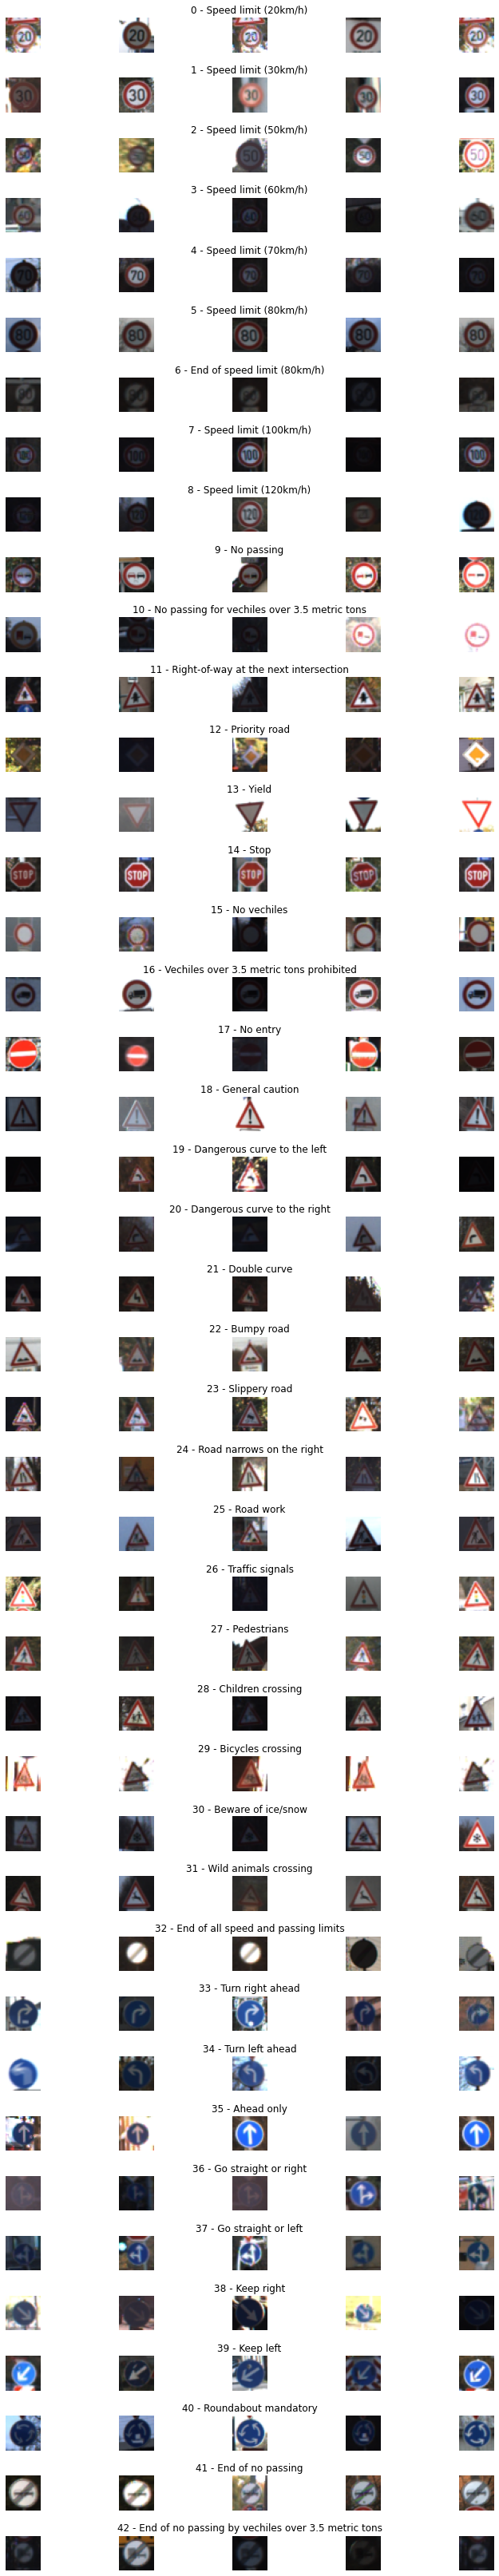

In [12]:
# Display Some Samples Images of All The Classes
num_of_samples = []
cols = 5
num_classes = noOfClasses

fig,ax = plt.subplots(num_classes ,cols, figsize = (10,45))
fig.tight_layout()

for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        ax[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), : ,:],cmap = plt.get_cmap("gray"))
        ax[j][i].axis("off")
        if i == 2:
            ax[j][i].set_title(str(j) + " - " + row["Name"])
            num_of_samples.append(len(x_selected))

plt.show()

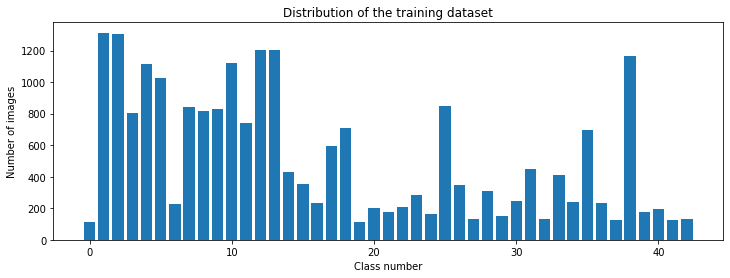

In [13]:
plt.figure(figsize = (12,4))
plt.bar(range(0, num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

# PreProcessing The Images

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,Dropout,Dense,MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [15]:
def grayscale(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return img

def equalize(image):
    img = cv2.equalizeHist(image)
    return img

def preprocessing(image):
    img = grayscale(image)
    img = equalize(img)
    img = img / 255
    return img

In [16]:
X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

In [17]:
X_train.shape,X_validation.shape,X_test.shape

((22271, 32, 32), (5568, 32, 32), (6960, 32, 32))

In [18]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

X_train.shape,X_validation.shape,X_test.shape

((22271, 32, 32, 1), (5568, 32, 32, 1), (6960, 32, 32, 1))

In [19]:
dataGen = ImageDataGenerator(width_shift_range = 0.1, # 0.1 = 10% IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                             height_shift_range= 0.1,
                             zoom_range = 0.2, # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                             shear_range = 0.1, # MAGNITUDE OF SHEAR ANGLE 
                             rotation_range = 10) # DEGREES

In [20]:
def display_img(image):

    plt.figure(figsize = (7,7))
    plt.imshow(image, cmap = "gray")
    plt.title(f"Shape : {image.shape}")
    plt.show()


# Important !!!

dataGen.fit(X_train)
batches = dataGen.flow(X_train,y_train,batch_size = 20)
X_batch,y_batch = next(batches)
X_batch.shape,y_batch.shape

((20, 32, 32, 1), (20,))

In [21]:
imageDimesions

(32, 32, 3)

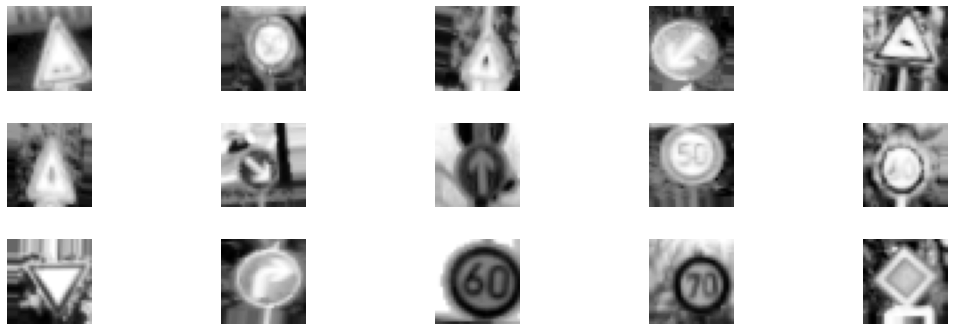

In [22]:
fig, ax = plt.subplots(3,5,figsize = (15,5))
ax = ax.ravel()
fig.tight_layout()

for i in range(15):
    ax[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]),cmap = "gray")
    ax[i].axis("off")
plt.show()

In [23]:
y_train = tf.keras.utils.to_categorical(y_train,noOfClasses)
y_validation = tf.keras.utils.to_categorical(y_validation,noOfClasses)
y_test = tf.keras.utils.to_categorical(y_test,noOfClasses)

In [24]:
y_train.shape,y_validation.shape,y_test.shape

((22271, 43), (5568, 43), (6960, 43))

In [20]:
def myModel():
    no_of_filters = 60
    size_of_filter5 = (5,5)

    size_of_filter3 = (3,3)
    size_of_pool = (2,2)
    no_of_nodes = 500

    model = tf.keras.models.Sequential()
    model.add((Conv2D(filters = no_of_filters,kernel_size = size_of_filter5,
                      input_shape = (imageDimesions[0],imageDimesions[1],1), activation = "relu")))
    model.add((Conv2D(filters = no_of_filters,kernel_size = size_of_filter5, activation = "relu")))
    model.add(MaxPool2D(pool_size = size_of_pool))

    model.add((Conv2D(filters = no_of_filters // 2,kernel_size = size_of_filter3, activation = "relu")))
    model.add((Conv2D(filters = no_of_filters // 2,kernel_size = size_of_filter3, activation = "relu")))
    model.add(MaxPool2D(pool_size = size_of_pool))
    model.add(Dropout(rate = 0.5))

    model.add(Flatten())
    model.add(Dense(units = no_of_nodes, activation="relu"))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(units = noOfClasses,activation = "softmax"))

    model.compile(Adam(lr = 0.001),loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

In [32]:
model = myModel()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 module_wrapper_2 (ModuleWra  (None, 12, 12, 60)       0         
 pper)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 module_wrapper_3 (ModuleWra  (None, 4, 4, 30)         0         
 pper)                                                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
batch_size_val,steps_per_epoch_val,epochs_val

(50, 2000, 10)

In [34]:
history = model.fit_generator(dataGen.flow(X_train,y_train, batch_size = batch_size_val),
                              steps_per_epoch = 400,
                              epochs = epochs_val,
                              validation_data = (X_validation,y_validation),shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
400/400 [==============================] - 14s 32ms/step - loss: 2.8309 - accuracy: 0.2208 - val_loss: 1.1121 - val_accuracy: 0.6216
Epoch 2/10
400/400 [==============================] - 13s 33ms/step - loss: 1.4318 - accuracy: 0.5577 - val_loss: 0.5066 - val_accuracy: 0.8454
Epoch 3/10
400/400 [==============================] - 14s 35ms/step - loss: 0.9860 - accuracy: 0.6924 - val_loss: 0.2886 - val_accuracy: 0.9172
Epoch 4/10
400/400 [==============================] - 14s 34ms/step - loss: 0.7915 - accuracy: 0.7507 - val_loss: 0.1810 - val_accuracy: 0.9574
Epoch 5/10
400/400 [==============================] - 16s 39ms/step - loss: 0.6328 - accuracy: 0.8018 - val_loss: 0.1383 - val_accuracy: 0.9628
Epoch 6/10
400/400 [==============================] - 13s 33ms/step - loss: 0.5590 - accuracy: 0.8250 - val_loss: 0.1323 - val_accuracy: 0.9637
Epoch 7/10
400/400 [==============================] - 13s 32ms/step - loss: 0.4941 - accuracy: 0.8445 - val_loss: 0.1041 - val_accuracy:

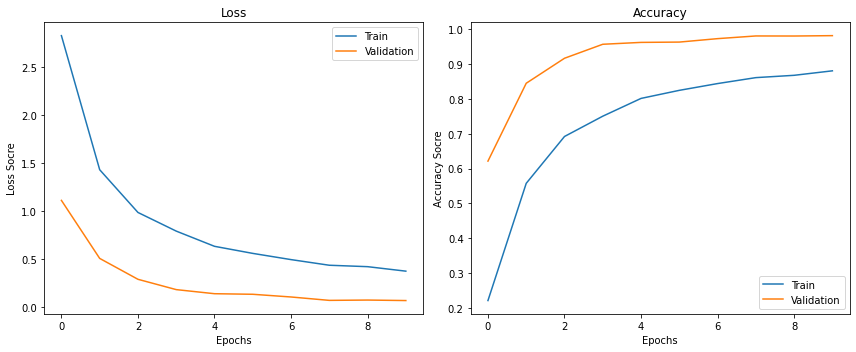

In [35]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = "Train")
plt.plot(history.history['val_loss'], label = "Validation")
plt.legend(loc = "best")
plt.title("Loss")
plt.ylabel("Loss Socre")
plt.xlabel('Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label = "Train")
plt.plot(history.history['val_accuracy'],label = "Validation")
plt.legend(loc = "best")
plt.title("Accuracy")
plt.ylabel("Accuracy Socre")
plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

In [36]:
score = model.evaluate(X_test,y_test, verbose = 0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.06632009148597717
Test Accuracy: 0.9804597496986389


In [39]:
model.save_weights("/content/traffics_weights_models.h5")

---

In [16]:
print(tf.__version__)

2.0.0


In [33]:
#rb = Read Byte
#pickle_in = open("/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/model_trained.p","rb")
#new_model = pickle.load(pickle_in)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,Dropout,Dense,MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

noOfClasses = 43

def myModel():
    no_of_filters = 60
    size_of_filter5 = (5,5)

    size_of_filter3 = (3,3)
    size_of_pool = (2,2)
    no_of_nodes = 500

    model = tf.keras.models.Sequential()
    model.add((Conv2D(filters = no_of_filters,kernel_size = size_of_filter5,
                      input_shape = (imageDimesions[0],imageDimesions[1],1), activation = "relu")))
    model.add((Conv2D(filters = no_of_filters,kernel_size = size_of_filter5, activation = "relu")))
    model.add(MaxPool2D(pool_size = size_of_pool))

    model.add((Conv2D(filters = no_of_filters // 2,kernel_size = size_of_filter3, activation = "relu")))
    model.add((Conv2D(filters = no_of_filters // 2,kernel_size = size_of_filter3, activation = "relu")))
    model.add(MaxPool2D(pool_size = size_of_pool))
    model.add(Dropout(rate = 0.5))

    model.add(Flatten())
    model.add(Dense(units = no_of_nodes, activation="relu"))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(units = noOfClasses,activation = "softmax"))

    model.compile(Adam(lr = 0.001),loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

In [30]:
new_model = myModel()
new_model.load_weights("/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/traffics_weights_models.h5")

In [31]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 30)         

In [41]:
def display_img(image):
    
    plt.figure(figsize = (7,7))
    plt.imshow(image,cmap = "gray")
    plt.title(f"Shape : {image.shape}")
    plt.show()

def grayscale(image):
    img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return img

def equalize(image):
    img = cv2.equalizeHist(image)
    return img

def preprocessing(image):
    img = grayscale(image)
    img = equalize(img)
    img = img / 255
    return img

def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

In [55]:
test_img = cv2.imread("/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/myData/0/0_10000_1577671998.6491628.png")
img = np.asarray(test_img)
img = cv2.resize(img, (32,32))
img = preprocessing(img)
img = img.reshape(1,32,32,1)

prediction = new_model.predict(img)
classIndex = np.argmax(prediction)
probability = np.amax(prediction)
classIndex,probability

(0, 0.9970356)

In [57]:
frameWidth = 640
frameHeight = 480
brightness = 180
threshold = 0.75
font = cv2.FONT_HERSHEY_SIMPLEX

cap = cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4,frameHeight)
cap.set(10,brightness)


while True:
    
    conn, imgOriginal = cap.read()
    
    img = np.asarray(imgOriginal)
    img = cv2.resize(img, (32,32))
    img = preprocessing(img)
    #cv2.imshow("Processed Image",img)
    
    img = img.reshape(1,32,32,1)
    
    cv2.putText(imgOriginal, "Class : ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(imgOriginal, "Probability : ",(20,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
    
    # Predict Image
    
    predictions = new_model.predict(img)
    classIndex = np.argmax(predictions)
    probability = np.amax(predictions)
    
    if probability > threshold:
        
        cv2.putText(imgOriginal, str(classIndex) + " " + str(getCalssName(classIndex)),
                    (120,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(imgOriginal, str(round(probability*100,2)) +  "%",
                    (180,75),font,0.75,(0,0,255),2,cv2.LINE_AA)

        cv2.imshow("Result Image",imgOriginal)
        
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()